In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/linkedin-reviews.csv')
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
data.describe()

,Rating
count,702.000000
mean,2.534188
std,1.481546
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [ ]:
rating_counts = data['Rating'].value_counts().reset_index()
rating_counts

,Rating,count
0,1,275
1,4,122
2,3,121
3,5,95
4,2,89


In [ ]:
rating_counts.columns = ['Rating', 'Count']
rating_counts

,Rating,Count
0,1,275
1,4,122
2,3,121
3,5,95
4,2,89


In [ ]:
fig = px.bar(rating_counts, x='Rating', y='Count', title='Distribution of Ratings')
fig.show()

In [ ]:
data['Review_len'] = data['Review'].apply(len)
data.head()

,Review,Rating,Review_len
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23
2,Slow and it tries to upload your contacts with...,1,61
3,Add ability to customize the profile and move ...,4,90
4,"Good app, but it's a pain that it's not possib...",4,133


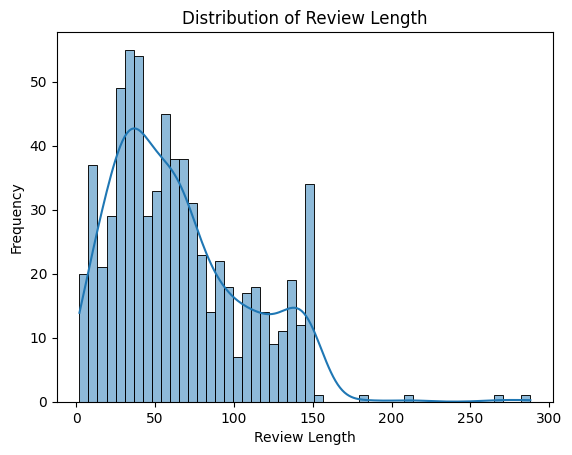

In [ ]:
sns.histplot(data['Review_len'], bins = 50, kde = True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob
def review_Analysis(review):
  sentiment = TextBlob(review).sentiment
  if sentiment.polarity >0.1:
    return 'Positive'
  elif sentiment.polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

data['Sentiment'] = data['Review'].apply(review_Analysis)
data.head()

,Review,Rating,Review_len,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


In [ ]:
sentiment_counts = data['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
sentiment_counts

,Sentiment,Count
0,Positive,298
1,Neutral,297
2,Negative,107


In [ ]:

fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title = 'Sentiment Count')
fig.show()

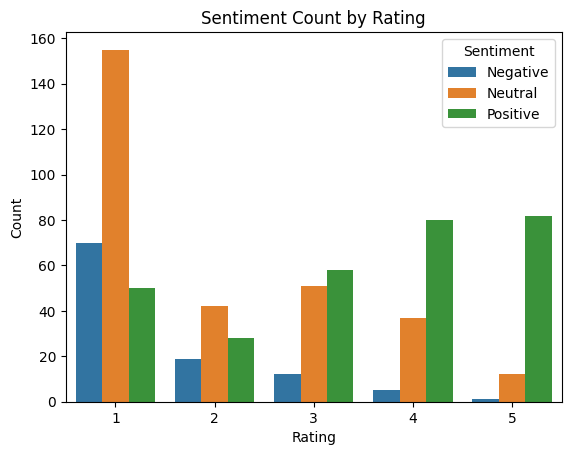

In [ ]:
sns.countplot(data = data, x='Rating', hue = 'Sentiment')
plt.title('Sentiment Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

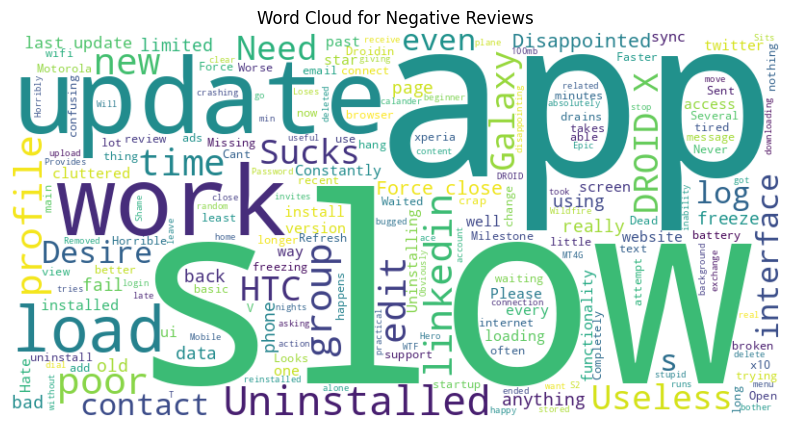

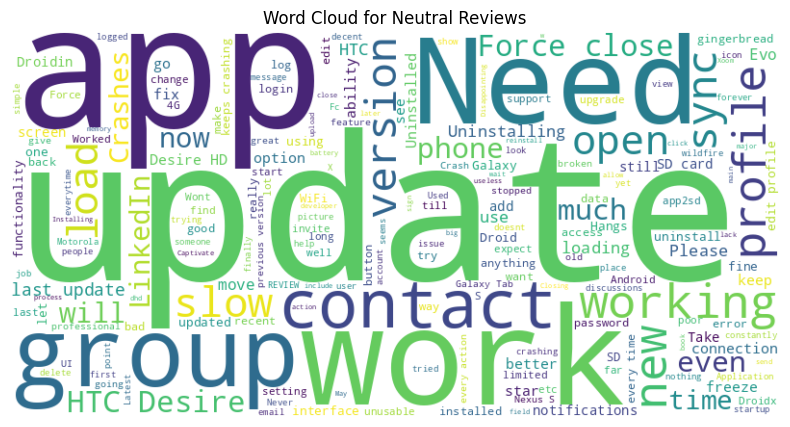

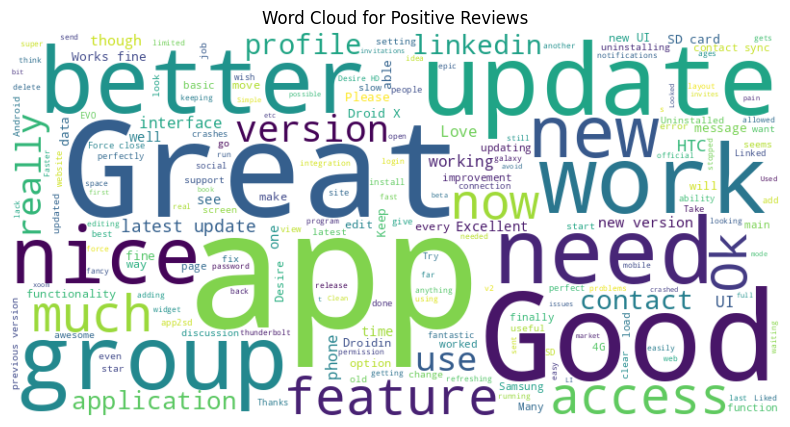

In [ ]:
from wordcloud import WordCloud
def generate__word_cloud(sentiment):
  text = ' '.join(review for review in data[data['Sentiment']==sentiment]['Review'])
  wordcloud = WordCloud(width = 800, height = 400, background_color = 'White').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {sentiment} Reviews')
  plt.show()

for sentiment in data['Sentiment'].unique():
  generate__word_cloud(sentiment)